In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

In [2]:
x = np.linspace(0,10,1000)

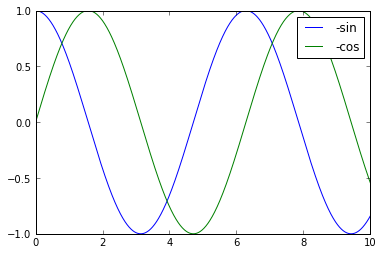

In [5]:
#fig - contains all the subplots
#ax - array of all subplots
fig,ax = plt.subplots()
ax.plot(x,np.cos(x),label='-sin')
ax.plot(x,np.sin(x), label='-cos')
leg =ax.legend()

In [6]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

In [7]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [8]:
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

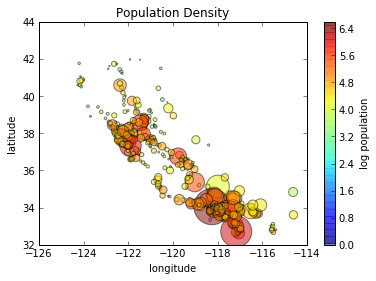

In [12]:
plt.scatter(lon, lat, c = np.log10(population), s=area, alpha=0.5 )
plt.colorbar(label='log population')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Population Density')

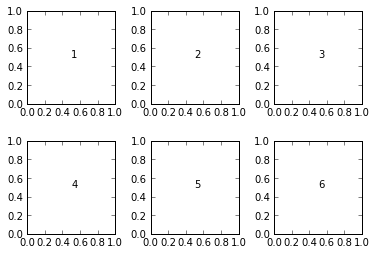

In [15]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5, str(i))

In [16]:
births = pd.read_csv('births.csv')

In [17]:
births

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
5,1969,1,3,M,4994
6,1969,1,4,F,4440
7,1969,1,4,M,4520
8,1969,1,5,F,4192
9,1969,1,5,M,4198


In [31]:
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                     [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                         for (month, day) in births_by_date.index]

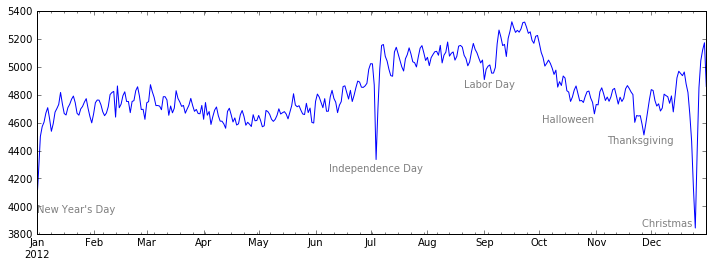

In [32]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);
# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

In [33]:
births

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548
1969-01-03,1969,1,3,M,4994
1969-01-04,1969,1,4,F,4440
1969-01-04,1969,1,4,M,4520
1969-01-05,1969,1,5,F,4192
1969-01-05,1969,1,5,M,4198
